In [1]:
!pwd
# %cd yuzz2516_Trajectory/Trajectory


/Users/obara/Library/CloudStorage/OneDrive-東京理科大学/2022研究室/卒論/コード関係/yuzz2516_Trajectory/Trajectory/notebooks


In [2]:

#   %cd ..
import argparse
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from pylab import ogrid




from utils.parser import *
from utils.homography import *

/Users/obara/Library/CloudStorage/OneDrive-東京理科大学/2022研究室/卒論/コード関係/yuzz2516_Trajectory/Trajectory


In [80]:
path_1= 'thumbnails/kyoto_c_no3.png'                                               # 画像のパス
i_1 = cv2.imread(path_1, 1)

figure = "thumbnails/kyoto_c_3_1000_1000.png"                           # 画像読み込み
figure_1 = cv2.imread(figure, 1)

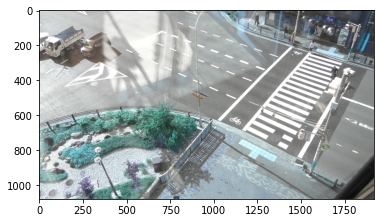

In [81]:
plt.imshow(i_1)


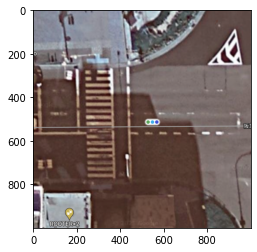

In [60]:
plt.imshow(figure_1)

## 点の場所を確認するため


In [7]:
import cv2
import numpy as np

img=cv2.imread(path_1,cv2.IMREAD_GRAYSCALE)

def mouse_move(event, x, y, flags, params):
    if event == cv2.EVENT_MOUSEMOVE:
        img2 = np.copy(img)
        cv2.circle(img2,center=(x,y),radius=5,color=255,thickness=-1)
        pos_str='(x,y)=('+str(x)+','+str(y)+')'
        cv2.putText(img2,pos_str,(30, 30),cv2.FONT_HERSHEY_PLAIN,2,255,2,cv2.LINE_AA)
        cv2.imshow('window', img2)
     
cv2.imshow('window', img)
cv2.setMouseCallback('window', mouse_move)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
import cv2
import numpy as np

img=cv2.imread(figure,cv2.IMREAD_GRAYSCALE)

def mouse_move(event, x, y, flags, params):
    if event == cv2.EVENT_MOUSEMOVE:
        img2 = np.copy(img)
        cv2.circle(img2,center=(x,y),radius=5,color=0,thickness=-1)
        pos_str='(x,y)=('+str(x)+','+str(y)+')'
        cv2.putText(img2,pos_str,(30, 30),cv2.FONT_HERSHEY_PLAIN,2,0,2,cv2.LINE_AA)
        cv2.imshow('window', img2)
     
cv2.imshow('window', img)
cv2.setMouseCallback('window', mouse_move)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 射影変換

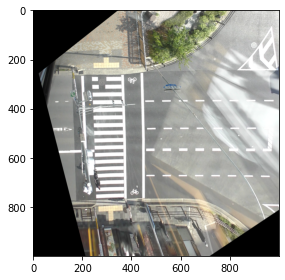

In [6]:
# 変換前後の対応点を設定
p_original = np.float32([[1721,1020],[1009,663],[1206,57],[1743,275]])
p_trans = np.float32([[91,237],[438,229],[702,880],[265,800]])

# 変換マトリクスと射影変換
M = cv2.getPerspectiveTransform(p_original, p_trans)
i_trans = cv2.warpPerspective(i_1, M, (1000, 1000))

cv2.imwrite("out.jpg", i_trans)
 
#ここからグラフ設定
fig = plt.figure()
ax1 = fig.add_subplot(111)
 
# 画像をプロット
show = cv2.cvtColor(i_trans, cv2.COLOR_BGR2RGB)
ax1.imshow(show)
 
fig.tight_layout()
plt.show()
plt.close()

# トラッキング座標の変換

In [7]:
text_point = np.array([1218.38,725.36,1])
#i_trans = cv2.warpPerspective(text_point, M, (1920, 1080))
print(M)
a= np.dot(M,text_point)
print(a)
w= a[2]
x,y = [a[0]/w,a[1]/w]
print(x,y)

[[-6.95317417e-01 -2.54512427e-01  1.66114169e+03]
 [ 5.71635181e-01 -8.03465439e-01  3.69385387e+02]
 [ 7.31374122e-05  1.10368047e-03  1.00000000e+00]]
[629.3677262  483.05256835   1.88967483]
333.05609862170525 255.6273497117613


In [8]:
text = "texts/kyoto_c_no3_fir1.txt"
df = parser_class(text)
#df = centerize(df)
df

frame     ID     x    y    w    h  class_id
0           3      3  1231   18   28   66         7
1           3      4   202  138  174  144         1
2           3      5  1389   76   34   81         7
3           3      6  1538  170   44   76         7
4           4      1     0  110  222  188         4
...       ...    ...   ...  ...  ...  ...       ...
390711  53949  14711  1431  440   44   96         7
390712  53949  14715    45  235  196  142         1
390713  53949  14736   431   91   88   98        12
390714  53949  14741     0   92  158  139         1
390715  53949  14754   523   25   65   92        12

[390716 rows x 7 columns]

## ここから下が射影変換についての基本

In [3]:

# 射影変換，追跡座標変換，
# %cd ..
import argparse
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np


from utils.parser import *
from utils.homography import *

text = "texts/kyoto_c_no3_fir1.txt"
df = parser_class(text)

p_original = point_to_list(1721,1020,1009,663,1206,57,1743,275)
p_trans = point_to_list(91,237,438,229,702,880,265,800)

M = homography_trans(p_original,p_trans)
print(M)

df['x_c'] = df['x'] + df['w']/2
df['y_c'] = df['y'] + df['h']
df2 = df.drop(columns=["frame", "ID", "x", "y", "w","h","class_id"])
i = 0
x_homo_list = []
y_homo_list = []
for index, row in df2.iterrows():
   x_c,y_c = (row['x_c'],row['y_c'])
   P = [x_c,y_c,1]
   t_p = np.dot(M,P)
   w= t_p[2]
   x_homo,y_homo = [t_p[0]/w,t_p[1]/w]
   x_homo_list.append(x_homo)
   y_homo_list.append(y_homo)

df['x_trans'] = x_homo_list
df['y_trans'] = y_homo_list

print(df)

[[-6.95317417e-01 -2.54512427e-01  1.66114169e+03]
 [ 5.71635181e-01 -8.03465439e-01  3.69385387e+02]
 [ 7.31374122e-05  1.10368047e-03  1.00000000e+00]]
        frame     ID     x    y    w    h  class_id     x_c  y_c      x_trans  \
0           3      3  1231   18   28   66         7  1245.0   84   653.923972   
1           3      4   202  138  174  144         1   289.0  282  1042.066135   
2           3      5  1389   76   34   81         7  1406.0  157   504.319723   
3           3      6  1538  170   44   76         7  1560.0  246   370.840471   
4           4      1     0  110  222  188         4   111.0  298  1127.972924   
...       ...    ...   ...  ...  ...  ...       ...     ...  ...          ...   
390711  53949  14711  1431  440   44   96         7  1453.0  536   302.988741   
390712  53949  14715    45  235  196  142         1   143.0  377  1027.488721   
390713  53949  14736   431   91   88   98        12   475.0  189  1031.710813   
390714  53949  14741     0   92  158

/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_51648/3948330657.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_class_id = df_class_id.append(group)
/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_51648/3948330657.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_class_id = df_class_id.append(group)
/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_51648/3948330657.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_class_id = df_class_id.append(group)
/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_51648/3948330657.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_class

        frame     ID     x    y    w    h class_id     x_c  y_c      x_trans  \
4           4      1     0  110  222  188        4   111.0  298  1127.972924   
9           5      1     2  121  207  185        4   105.5  306  1122.236897   
14          6      1     1  123  204  177        4   103.0  300  1130.381080   
18          7      1     0  130  191  195        4    95.5  325  1107.156495   
23          8      1     0  140  170  194        4    85.0  334  1103.420026   
...       ...    ...   ...  ...  ...  ...      ...     ...  ...          ...   
390475  53934  14742  1319  540   41  109        7  1339.5  649   311.193894   
390627  53944  14749  1300  569   44   92        7  1322.0  661   314.145729   
390679  53947  14752   390    0  154   78        0   467.0   78  1175.260523   
390697  53948  14752   385    0  161   80        0   465.5   80  1173.539708   
390715  53949  14754   523   25   65   92       12   555.5  117  1064.420537   

           y_trans  
4       144.653715

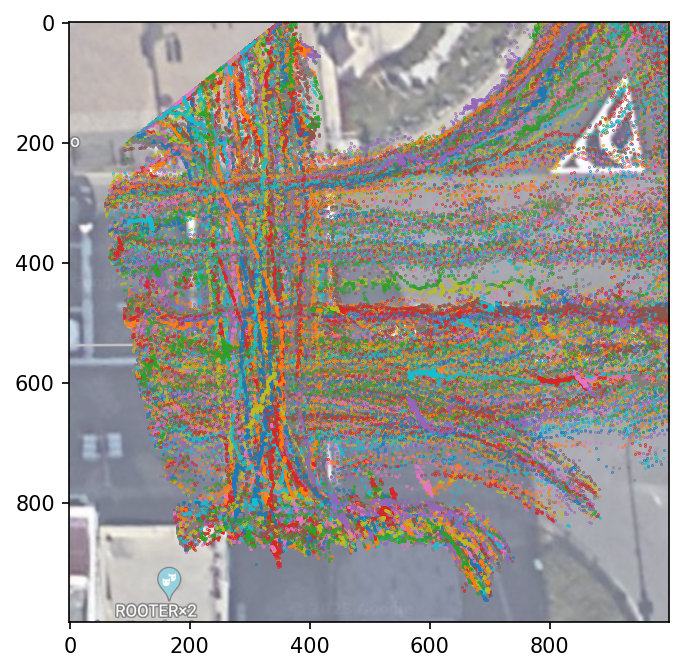

In [4]:
# class_ID 変更するデータフレーム
cols = ["frame", "ID", "x", "y", "w","h","class_id","x_c",'y_c','x_trans',"y_trans"]
df_class_id = pd.DataFrame(index=[], columns=cols)

# 追跡変換座標を描画
fig = plt.figure(facecolor="w",dpi=150)
ax = fig.add_subplot(1, 1, 1, aspect="equal")
df_plot = df
#df_plot = df_plot.query('0<ID < 2000')
#df_plot = df_plot.query('class_id ==10')
#df_plot = df_plot.query('500< x_trans < 800 & 100 <y_trans<900')


for ID, group in df_plot.groupby('ID'):
    frame = group['frame']
    car_id = group['ID']
    id_max = max(car_id)
    id_min = min(car_id)
    x_min = group['x']
    y_min = group['y']
    w = group['w']
    h = group['h']
    f_max = max(frame)
    f_min = min(frame)
    x_c_trans = group['x_trans']
    y_c_trans = group['y_trans']
    class_ID = group['class_id']
    #print(f_max, f_min, car_id)

    #ここでクラスの最頻値取得
    
    class_id = group['class_id'].mode()
    group['class_id'] = class_id
    class_id = class_id.iat[0]
    
    group['class_id'] = class_id
    df_class_id = df_class_id.append(group)
    
    
    plt.scatter(x_c_trans, y_c_trans, cmap='jet', s=0.1)
    

print(df_class_id)
im = Image.open('thumbnails/kyoto_c_3_1000_1000.png')
#sns.scatterplot(x=X[:,0], y=X[:,1], hue=["cluster-{}".format(x) for x in labels])
plt.imshow(im, alpha=0.6)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig('output_kyoto_c_no3_fir1.png')


## 通過人数

In [10]:
df_person = df_class_id
#df_person = df_plot
df_person = df_person.query(' 200< x_trans < 500 & 400 <y_trans<410')


df_person_10 = df_person.query('class_id == 7')
df_person_10 = df_person_10["ID"].unique()
print(str("通過人数は")+str(len(df_person_10))+str("人です"))  

#df_person = df_person["ID"].unique()
#print(str("通過人数は")+str(len(df_person))+str("人です"))


通過人数は9人です


In [92]:
cols = ['ID','y_dif']
df_frame_info = pd.DataFrame(index=[], columns=cols)
dis = 0
#print(df_frame_info)

df_person = df_class_id
#dis_len = len(df_person)
#範囲指定
df_person = df_person.query(' 200< x_trans < 500 & 470 <y_trans<500')

df_person = df_person.query('@s9_frame<frame<@e9_frame')

id_num = df_person['ID'].unique()
for id in id_num:
    
    #print(id)
    df_person_id = df_person.query('ID==@id')
    
    #フレーム差を取得
    df_person_f = df_person.groupby(['ID'],as_index=False).first()
    df_person_l = df_person.groupby(['ID'],as_index=False).last()

    frame_f = df_person_f.query('ID==@id')
    frame_f = frame_f.iloc[0,10]
    
    frame_l = df_person_l.query('ID==@id')
    frame_l = frame_l.iloc[0,10]
    y_dif = frame_l - frame_f
    if y_dif > 0 :
        append_list = pd.Series([id,1],index=['ID','y_dif'])

    elif y_dif==0 :
        append_list = pd.Series([id,0],index=['ID','y_dif'])

    elif y_dif < 0 :
        append_list = pd.Series([id,-1],index=['ID','y_dif'])
    
    df_frame_info = df_frame_info.append(append_list,ignore_index=True)
    #print(df_frame_info)
    #print(str(dis)+'/'+str(dis_len))
    dis = dis +1

df_class_id_2 = pd.merge(df_person,df_frame_info,on='ID', how='left')
#print(df_class_id_2)

#人数カウント
df_class_id_2 = df_class_id_2.query(' 200< x_trans < 500 & 470 <y_trans<500')

#person_1
y_dif_num = 1
df_person_7_1 = df_class_id_2.query('class_id == 7 ')
df_person_7_1 = df_person_7_1.query('y_dif == @y_dif_num')
df_person_7_1 =df_person_7_1["ID"].unique()
print(str("歩行者１通過人数は")+str(len(df_person_7_1))+str("人です"))  
#person_-1(2)
y_dif_num = -1
df_person_7_2 = df_class_id_2.query('class_id == 7 ')
df_person_7_2 = df_person_7_2.query('y_dif == @y_dif_num')
df_person_7_2 =df_person_7_2["ID"].unique()
print(str("歩行者−１通過人数は")+str(len(df_person_7_2))+str("人です"))  
#bicycle_1
y_dif_num = 1
df_person_10_1 = df_class_id_2.query('class_id == 10 ')
df_person_10_1 = df_person_10_1.query('y_dif == @y_dif_num')
df_person_10_1 =df_person_10_1["ID"].unique()
print(str("自転車１通過人数は")+str(len(df_person_10_1))+str("人です"))  
#bicyclw_-1(2)
y_dif_num = -1
df_person_10_2 = df_class_id_2.query('class_id == 10 ')
df_person_10_2 = df_person_10_2.query('y_dif == @y_dif_num')
df_person_10_2 =df_person_10_2["ID"].unique()
print(str("自転車−１通過人数は")+str(len(df_person_10_2))+str("人です"))  




#df_person = df_person["ID"].unique()
#print(str("通過人数は")+str(len(df_person))+str("人です"))



歩行者１通過人数は0人です
歩行者−１通過人数は4人です
自転車１通過人数は2人です
自転車−１通過人数は3人です


# 速度推定

In [5]:
#ここで時間を絞る
#1

s1_h = 0
s1_m = 0
s1_s = 0

e1_h = 0
e1_m = 0
e1_s = 30

s1_frame = ((s1_h*3600)+(s1_m*60)+s1_s)*30
e1_frame = ((e1_h*3600)+(e1_m*60)+e1_s)*30

#2
s2_h = 0
s2_m = 2
s2_s = 10

e2_h = 0
e2_m = 2
e2_s = 45

s2_frame = ((s2_h*3600)+(s2_m*60)+s2_s)*30
e2_frame = ((e2_h*3600)+(e2_m*60)+e2_s)*30

#3
s3_h = 0
s3_m = 4
s3_s = 41

e3_h = 0
e3_m = 5
e3_s = 32

s3_frame = ((s3_h*3600)+(s3_m*60)+s3_s)*30
e3_frame = ((e3_h*3600)+(e3_m*60)+e3_s)*30

#4
s4_h = 0
s4_m = 4
s4_s = 41

e4_h = 0
e4_m = 5
e4_s = 32

s4_frame = ((s4_h*3600)+(s4_m*60)+s4_s)*30
e4_frame = ((e4_h*3600)+(e4_m*60)+e4_s)*30

#5
s5_h = 0
s5_m = 7
s5_s = 10

e5_h = 0
e5_m = 7
e5_s = 50

s5_frame = ((s5_h*3600)+(s5_m*60)+s5_s)*30
e5_frame = ((e5_h*3600)+(e5_m*60)+e5_s)*30

#6 車が横断歩道の途中で停止
s6_h = 0
s6_m = 9
s6_s = 42

e6_h = 0
e6_m = 10
e6_s = 27

s6_frame = ((s6_h*3600)+(s6_m*60)+s6_s)*30
e6_frame = ((e6_h*3600)+(e6_m*60)+e6_s)*30

#7 
s7_h = 0
s7_m = 12
s7_s = 10

e7_h = 0
e7_m = 12
e7_s = 50

s7_frame = ((s7_h*3600)+(s7_m*60)+s7_s)*30
e7_frame = ((e7_h*3600)+(e7_m*60)+e7_s)*30

#8 
s8_h = 0
s8_m = 14
s8_s = 39

e8_h = 0
e8_m = 15
e8_s = 29

s8_frame = ((s8_h*3600)+(s8_m*60)+s8_s)*30
e8_frame = ((e8_h*3600)+(e8_m*60)+e8_s)*30

#9 
s9_h = 0
s9_m = 17
s9_s = 11

e9_h = 0
e9_m = 17
e9_s = 50

s9_frame = ((s9_h*3600)+(s9_m*60)+s9_s)*30
e9_frame = ((e9_h*3600)+(e9_m*60)+e9_s)*30

#10 信号無視あり
s10_h = 0
s10_m = 19
s10_s = 39

e10_h = 0
e10_m = 20
e10_s = 45

s10_frame = ((s10_h*3600)+(s10_m*60)+s10_s)*30
e10_frame = ((e10_h*3600)+(e10_m*60)+e10_s)*30

#11 
s11_h = 0
s11_m = 22
s11_s = 9

e11_h = 0
e11_m = 23
e11_s = 3

s11_frame = ((s11_h*3600)+(s11_m*60)+s11_s)*30
e11_frame = ((e11_h*3600)+(e11_m*60)+e11_s)*30

#12 
s12_h = 0
s12_m = 24
s12_s = 40

e12_h = 0
e12_m = 25
e12_s = 27

s12_frame = ((s12_h*3600)+(s12_m*60)+s12_s)*30
e12_frame = ((e12_h*3600)+(e12_m*60)+e12_s)*30

#13 
s13_h = 0
s13_m = 27
s13_s = 10

e13_h = 0
e13_m = 28
e13_s = 10

s13_frame = ((s13_h*3600)+(s13_m*60)+s13_s)*30
e13_frame = ((e13_h*3600)+(e13_m*60)+e13_s)*30

#14 
s14_h = 0
s14_m = 29
s14_s = 46

e14_h = 0
e14_m = 30
e14_s = 00

s14_frame = ((s14_h*3600)+(s14_m*60)+s14_s)*30
e14_frame = ((e14_h*3600)+(e14_m*60)+e14_s)*30

def frame(frame_num):
    if frame_num == 2:
        s_frame_name = s2_frame
        e_frame_name = e2_frame
        return(s_frame_name,e_frame_name)

a ,b =frame(2)
print(a)
print(b)


# s_frame_name = 's' + str(1) + '_frame'
# print(s_frame_name)
exec('s_frame_name = "s" + str(1) + "_frame"')
print(s_frame_name)



3900
4950
s1_frame


In [6]:
df_speed = df_class_id.drop(columns=["x", "y", "w", "h",'x_c','y_c'])
#df_speed = df_speed.query('class_id==7')
class_person = 7
class_bicycle = 10

#対象フレーム設定
df_speed = df_speed.query('@s1_frame<frame<@e1_frame')

df_speed = df_speed.query('class_id == [7,10]')
#df_speed = df_speed.query('class_id == 10')


#df_speed = df_speed.query('0< ID <1000')
#df_speed = df_speed.query('ID==87.0')
df_speed = df_speed.query(' 200< x_trans < 600 & 300 <y_trans< 700')
#df_speed = df_speed.groupby(['ID'])

print(df_speed)

     frame   ID class_id     x_trans     y_trans
184     50   21        7  227.997466  479.343663
193     52   21        7  224.065357  458.091456
199     53   21        7  223.572228  452.759618
219     57   21        7  224.351719  442.750786
225     58   21        7  226.062133  440.518892
...    ...  ...      ...         ...         ...
2284   616  184        7  377.480744  676.101375
2289   617  184        7  377.158631  679.152306
2294   618  184        7  378.233853  685.457885
2300   619  184        7  379.603977  690.172739
2306   620  184        7  380.914920  697.845802

[675 rows x 5 columns]


In [7]:
df_speed_f = df_speed.groupby(['ID'],as_index=False).first()
df_speed_f


ID  frame  class_id     x_trans     y_trans
0   21     50         7  227.997466  479.343663
1   87    359         7  230.328989  300.442056
2  123    392         7  252.290606  375.087917
3  124    458        10  393.589833  305.053534
4  127    529         7  253.231470  301.011563
5  154    551        10  358.160891  301.559032
6  184    591         7  371.570101  546.694916

In [8]:
df_speed_l = df_speed.groupby(['ID'],as_index=False).last()
df_speed_l

ID  frame  class_id     x_trans     y_trans
0   21    103         7  233.336129  304.403288
1   87    596         7  319.484429  697.233136
2  123    396         7  254.723887  383.032527
3  124    534        10  383.955102  695.657253
4  127    774         7  331.248520  698.355303
5  154    611        10  371.771565  644.328944
6  184    620         7  380.914920  697.845802

In [9]:
#df_frame_info = 0
cols = ['ID','class_id','all_distance','frame_dif']
df_frame_info = pd.DataFrame(index=[], columns=cols)
#print(df_frame_info)


id_num = df_speed['ID'].unique()
for id in id_num:
    
    #print(id)
    df_speed_id = df_speed.query('ID==@id')
    #class_id = df_speed_id['class_id']
    x_y = df_speed_id[['x_trans','y_trans']].values
    #print(x_y)
    # 各点間の差を取得
    x_y = np.diff(x_y, axis=0)
    # 各点間のユークリッド距離を計算
    every_distance = np.linalg.norm(x_y, axis=1)
    #print(every_distance)
    all_distance = np.sum(every_distance)
    #print(all_distance)

    #フレーム差を取得
    df_speed_f = df_speed.groupby(['ID'],as_index=False).first()
    df_speed_l = df_speed.groupby(['ID'],as_index=False).last()
    
    frame_f = df_speed_f.query('ID==@id')
    class_id = int(frame_f.iloc[0,2])
    frame_f = frame_f.iloc[0,1]
    
    frame_l = df_speed_l.query('ID==@id')
    frame_l = frame_l.iloc[0,1]
    frame_dif = frame_l - frame_f
    
    #class_id = frame_f.iloc[0,2]


    append_list = pd.Series([id,class_id,all_distance,frame_dif],index=['ID','class_id','all_distance','frame_dif'])
    df_frame_info = df_frame_info.append(append_list,ignore_index=True)
    #print(df_frame_info)
    df_frame_info = df_frame_info.query('30<frame_dif')

print(df_frame_info)
    

    
    

    
    

      ID  class_id  all_distance  frame_dif
0   21.0       7.0    292.173672       53.0
1   87.0       7.0    759.747566      237.0
2  124.0      10.0    467.016444       76.0
3  127.0       7.0    515.484015      245.0
4  154.0      10.0    495.788708       60.0


/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_51648/1422711452.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame_info = df_frame_info.append(append_list,ignore_index=True)
/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_51648/1422711452.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame_info = df_frame_info.append(append_list,ignore_index=True)
/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_51648/1422711452.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame_info = df_frame_info.append(append_list,ignore_index=True)
/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_51648/1422711452.py:39: FutureWarning: The frame.append method is deprecated and wi

### 実際の地図の縮尺に合わせて速度導出


In [10]:
fps = 30
expansion = 4/1000

use_figure_len = 45 #(44mm,実際に合わせた地図,基準の距離を測る)
use_figure_pxcel_h = 561.7
use_figure_pxcel_w = 1000

# 換算計算
real_len = use_figure_len / expansion 
print(real_len)
cel_real_len = real_len / use_figure_pxcel_h

df_frame_info['real_speed'] = 3.6*(df_frame_info['all_distance'] * cel_real_len)/(df_frame_info['frame_dif'])/fps
df_frame_info = df_frame_info.query('30<frame_dif')

print(df_frame_info)
df_frame_person = df_frame_info
df_frame_person = df_frame_person.query('class_id ==7')
df_frame_bicycle = df_frame_info.query('class_id == 10')
df_frame_bicycle = df_frame_bicycle.query('4 < real_speed ')
#print(df_frame_person)
df_frame_info.mean()
#df_frame_person.mean()
# df_frame_bicycle.mean()


11250.0
      ID  class_id  all_distance  frame_dif  real_speed
0   21.0       7.0    292.173672       53.0   13.249349
1   87.0       7.0    759.747566      237.0    7.704604
2  124.0      10.0    467.016444       76.0   14.768892
3  127.0       7.0    515.484015      245.0    5.056831
4  154.0      10.0    495.788708       60.0   19.859793


ID              102.600000
class_id          8.200000
all_distance    506.042081
frame_dif       134.200000
real_speed       12.127894
dtype: float64

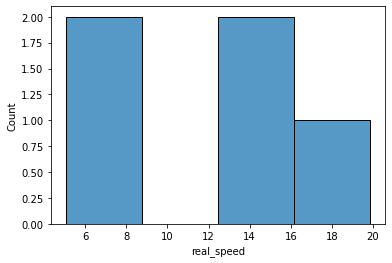

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#df = sns.load_dataset("iris")  #手元にiris.csvがない場合

sns.histplot(df_frame_info['real_speed'],kde = None)
plt.savefig("output/realspeed.png")
plt.show()

# TTC計算

In [466]:
df_speed = df_class_id.drop(columns=["x", "y", "w", "h",'x_c','y_c'])
#df_speed = df_speed.query('class_id==7')
class_person = 7
class_bicycle = 10

#対象フレーム設定
df_speed = df_speed.query('@s9_frame<frame<@e9_frame')

frame_zero_f = s9_frame + 465 #デフォルトは450,130からスタート
frame_zero_e = frame_zero_f + 30

df_speed = df_speed.query('@frame_zero_f<frame<@frame_zero_e')
df_speed = df_speed.query('class_id == [7,10]')
df_speed = df_speed.query(' 200< x_trans < 600 & 200 <y_trans< 800')
#df_speed = df_speed.groupby(['ID'])
# print(df_speed)

cols = ['ID','class_id','all_distance','frame_dif','x_vec_dif','y_vec_dif','x_trans_l','y_trans_l','frame_f']
df_frame_info = pd.DataFrame(index=[], columns=cols)
#print(df_frame_info)

id_num = df_speed['ID'].unique()
for id in id_num:
    
    #print(id)
    df_speed_id = df_speed.query('ID==@id')
    #class_id = df_speed_id['class_id']
    x_y = df_speed_id[['x_trans','y_trans']].values
    #print(x_y)
    # 各点間の差を取得
    x_y = np.diff(x_y, axis=0)
    # 各点間のユークリッド距離を計算
    every_distance = np.linalg.norm(x_y, axis=1)
    #print(every_distance)
    all_distance = np.sum(every_distance)
    #print(all_distance)

    #フレーム差を取得
    df_speed_f = df_speed.groupby(['ID'],as_index=False).first()
    df_speed_l = df_speed.groupby(['ID'],as_index=False).last()
    
    frame_f = df_speed_f.query('ID==@id')
    class_id = int(frame_f.iloc[0,2])
    # frame_f = frame_f.iloc[0,1]

    frame_vec_x_f = frame_f.iloc[0,3]
    frame_vec_y_f = frame_f.iloc[0,4]

    frame_f = frame_f.iloc[0,1]
    frame_l = df_speed_l.query('ID==@id')

    frame_vec_x_l = frame_l.iloc[0,3]
    frame_vec_y_l = frame_l.iloc[0,4]

    frame_l = frame_l.iloc[0,1]
    frame_dif = frame_l - frame_f

    #ベクトルの長さを出す
    frame_vec_f = np.array([frame_vec_x_f,frame_vec_y_f])
    frame_vec_l = np.array([frame_vec_x_l,frame_vec_y_l])

    frame_vec = (frame_vec_l - frame_vec_f)/frame_dif

    x_vec = frame_vec[0]
    y_vec = frame_vec[1]
    
    print(frame_vec)
    #class_id = frame_f.iloc[0,2]


    append_list = pd.Series([id,class_id,all_distance,frame_dif,x_vec,y_vec,frame_vec_x_l,frame_vec_y_l,frame_l],index=['ID','class_id','all_distance','frame_dif','x_vec_dif','y_vec_dif','x_trans_l','y_trans_l','frame_f'])
    df_frame_info = df_frame_info.append(append_list,ignore_index=True)
    #print(df_frame_info)
    df_frame_info = df_frame_info.query('10<frame_dif')

print(df_frame_info)


[-0.41682408 -1.40058112]
[-0.57964149 -0.4006484 ]
[-0.51647796 -5.30272676]
Empty DataFrame
Columns: [ID, class_id, all_distance, frame_dif, x_vec_dif, y_vec_dif, x_trans_l, y_trans_l, frame_f]
Index: []


/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_51648/535976386.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame_info = df_frame_info.append(append_list,ignore_index=True)
/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_51648/535976386.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame_info = df_frame_info.append(append_list,ignore_index=True)
/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_51648/535976386.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame_info = df_frame_info.append(append_list,ignore_index=True)


## この下でIDを選択して各対象ごとにまわす

In [467]:
# df_frame_info_vec = df_frame_info.query('class_id==10')
# num_bike_list =  df_frame_info_vec['ID'].unique()
from numpy import linalg as LA

fps = 30
expansion = 4/1000

use_figure_len = 45 #(44mm,実際に合わせた地図,基準の距離を測る)
use_figure_pxcel_h = 561.7
use_figure_pxcel_w = 1000

# 換算計算
real_len = use_figure_len / expansion 
# print(real_len)
cel_real_len = real_len / use_figure_pxcel_h

###################
row_num  = df_frame_info.query('ID == 8889').index[0]
print(row_num)
###################

df_frame_info_vec = df_frame_info
df_frame_info_vec['ttc'] = 0
df_frame_info_vec['V_r'] = 0
df_frame_info_vec['degree'] = 0
# df_frame_info_vec['frame_f'] = 0

df_frame_low_list = df_frame_info['ID'].unique() 
# print(df_frame_low_list)
num_list = 0
for num_list_for in df_frame_low_list:
    
    # print(num_list)

    #対象行の抽出
    x_num_bike = df_frame_info.iloc[row_num,6]
    y_num_bike = df_frame_info.iloc[row_num,7]
    num_bike_vec_position = np.array([x_num_bike,y_num_bike])
    vec_id_bike = df_frame_info.iloc[row_num,0]
    num_bike_vec_speed_x = df_frame_info.iloc[row_num,4]
    num_bike_vec_speed_y = df_frame_info.iloc[row_num,5]
    num_bike_vec_speed = np.array([num_bike_vec_speed_x,num_bike_vec_speed_y])

    #対象以外の抽出
    row_x_trans_l = df_frame_info.iloc[num_list,6]
    row_y_trans_l = df_frame_info.iloc[num_list,7]
    row_vec_position = np.array([row_x_trans_l,row_y_trans_l])
    vec_id_row = df_frame_info.iloc[num_list,0]
    row_vec_speed_x = df_frame_info.iloc[num_list,4]
    row_vec_speed_y = df_frame_info.iloc[num_list,5]
    row_vec_speed = np.array([row_vec_speed_x,row_vec_speed_y])
    row_frame_f = df_frame_info.iloc[num_list,8]
    # print(row_frame_f)

    #使用する特徴量
    distance_vec = (row_vec_position - num_bike_vec_position)
    distance_norm = np.linalg.norm(distance_vec)*cel_real_len
    speed_vec = (row_vec_speed - num_bike_vec_speed)*fps*cel_real_len

    if num_bike_vec_speed_y >= 0 and row_vec_speed_y >= 0 :
        if distance_vec[1] >= 0 :
            speed_vec = speed_vec
        else :
            speed_vec = [0.000001,0.000001]

    elif num_bike_vec_speed_y < 0 and row_vec_speed_y < 0 :
        if distance_vec[1] >= 0 :
            speed_vec = [0.000001,0.000001]
        else :
            speed_vec = speed_vec
    
    elif num_bike_vec_speed_y >= 0 and row_vec_speed_y < 0 :
        if distance_vec[1] >= 0 :
            speed_vec = speed_vec
        else :
            speed_vec = [0.000001,0.000001]

    elif num_bike_vec_speed_y < 0 and row_vec_speed_y >= 0 :
        if distance_vec[1] >= 0 :
            speed_vec = [0.000001,0.000001]
        else :
            speed_vec = speed_vec

    inner = np.inner(speed_vec,distance_vec)
    norm = LA.norm(speed_vec) * LA.norm(distance_vec)

    cos_vec = inner / (norm+0.00001) 
    radian = np.arccos(np.clip(cos_vec, -1.0, 1.0))
    radian = radian + np.pi
    # print(radian)
    # if speed_norm < 0
    speed_norm = np.linalg.norm(speed_vec)

    ttc_time = distance_norm/((speed_norm * np.cos(radian))+0.00001)

    df_frame_info_vec.iloc[num_list,8]= row_frame_f
    df_frame_info_vec.iloc[num_list,9]= ttc_time
    df_frame_info_vec.iloc[num_list,10]= speed_norm
    df_frame_info_vec.iloc[num_list,11]= np.rad2deg(radian)

    # print(df_frame_info_vec) 

    num_list = num_list + 1

    

print(df_frame_info_vec)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [468]:
# df_frame_info_vec_print = df_frame_info_vec
df_frame_info_vec_print = pd.concat([df_frame_info_vec_print,df_frame_info_vec])
df_frame_info_vec_print

ID  class_id  all_distance  frame_dif  x_vec_dif  y_vec_dif  \
0  8716.0       7.0     55.460474       28.0  -0.103742  -1.427450   
1  8811.0       7.0     66.019539       28.0  -0.300121  -1.512635   
2  8821.0       7.0     76.654845       28.0   0.073400  -1.556760   
3  8860.0       7.0     52.063776       28.0  -0.546343  -1.507040   
4  8889.0      10.0     96.083371       20.0  -2.565378  -1.195346   
0  8716.0       7.0     64.908733       28.0  -0.063188  -1.443115   
1  8811.0       7.0     94.944167       28.0  -0.644974  -2.145000   
2  8821.0       7.0     76.449972       28.0  -0.002498  -1.249298   
3  8860.0       7.0     87.185138       28.0  -0.287107  -1.581579   
4  8889.0      10.0    115.344060       28.0  -1.163452  -2.080991   
0  8716.0       7.0     58.783838       28.0   0.027914  -1.187701   
1  8811.0       7.0     89.688368       28.0  -0.687640  -1.998572   
2  8821.0       7.0     91.216040       28.0  -0.077966  -1.909135   
3  8860.0       7.0     86.279368       28.0  -0.452037  -1.931942   
4  8889.0      10.0    180.538963       28.0  -0.804160  -3.745922   
0  8716.0       7.0     65.317887       28.0  -0.213883  -1.615453   
1  8811.0       7.0     64.653858       24.0  -0.680948  -1.461959   
2  8821.0       7.0     98.409127       28.0  -0.321789  -2.060332   
3  8860.0       7.0     69.081307       28.0  -0.358123  -1.712371   
4  8889.0      10.0    189.503694       27.0   0.020842  -3.705166   
0  8716.0       7.0     70.981799       28.0  -0.228562  -1.679340   
1  8821.0       7.0     80.704797       28.0   0.008835  -1.267064   
2  8860.0       7.0     82.951787       28.0  -0.281620  -1.971939   
3  8889.0      10.0    187.451923       28.0   0.176082  -4.263518   
0  8716.0       7.0     80.295871       28.0  -0.323948  -1.919262   
1  8821.0       7.0     96.880811       28.0  -0.115816  -1.852758   
2  8860.0       7.0    109.281659       28.0  -0.184355  -2.094265   
3  8889.0      10.0    180.319786       28.0   0.208839  -4.262414   
0  8716.0       7.0     74.213824       28.0  -0.117152  -1.523140   
1  8821.0       7.0    106.161982       28.0  -0.172026  -2.159954   
2  8860.0       7.0    131.478305       28.0  -0.259635  -1.667064   
3  8889.0      10.0    183.857816       28.0   0.334776  -4.566351   
0  8716.0       7.0     61.743283       28.0  -0.024177  -1.300253   
1  8821.0       7.0     80.291420       28.0   0.042692  -1.797215   
2  8860.0       7.0    107.686632       28.0  -0.651574  -2.197163   
3  8889.0      10.0    208.863742       28.0  -0.306359  -5.236881   
0  8716.0       7.0     65.850221       28.0  -0.291713  -1.683896   
1  8821.0       7.0     40.545065       16.0   0.029106  -1.848614   
2  8860.0       7.0     84.474052       28.0  -0.572785  -1.840232   
3  8889.0      10.0    215.097071       28.0   0.256757  -4.428669   
0  8716.0       7.0     47.209767       23.0  -0.388425  -1.701483   
1  8860.0       7.0     28.526733       18.0  -0.321455  -0.510385   
2  8889.0      10.0    147.093570       21.0  -0.152579  -5.010292   
0  8716.0       7.0     47.209767       23.0  -0.388425  -1.701483   
1  8860.0       7.0     28.526733       18.0  -0.321455  -0.510385   
2  8889.0      10.0    147.093570       21.0  -0.152579  -5.010292   

    x_trans_l   y_trans_l  frame_f           ttc          V_r      degree  
0  305.184902  430.144724  31259.0  3.834038e+01  1485.645307  276.927078  
1  235.138630  326.253029  31259.0  3.840192e+01  1374.376246  280.092054  
2  246.449073  419.465909  31259.0  2.046897e+01  1600.323694  283.078093  
3  269.244372  599.315270  31259.0  7.799822e+00  1227.516830  294.545318  
4  378.332886  765.252774  31259.0  0.000000e+00     0.000001  270.000000  
0  302.325511  385.562300  31289.0  1.389801e+01   764.164597  306.781980  
1  216.914720  264.693140  31289.0  1.926851e+02   313.894467  278.628376  
2  244.550072  375.701506  31289.0  1.005300e+01   858.092376  321.853220  
3  260.736501  553.023274  31289

In [469]:
df_frame_info_vec_print.to_csv('./output/out_csv/f9_8889.csv')

In [541]:
# df_ttc_graph = pd.read_csv('./output/out_csv/f13_12508.csv',index_col=0)
# df_ttc_graph_con = pd.read_csv('./output/out_csv/f13_13289.csv',index_col=0)

# df_ttc_graph_con = pd.concat([df_ttc_graph,df_ttc_graph_con])

df_ttc_graph_con.to_csv('./output/out_csv/f13.csv')


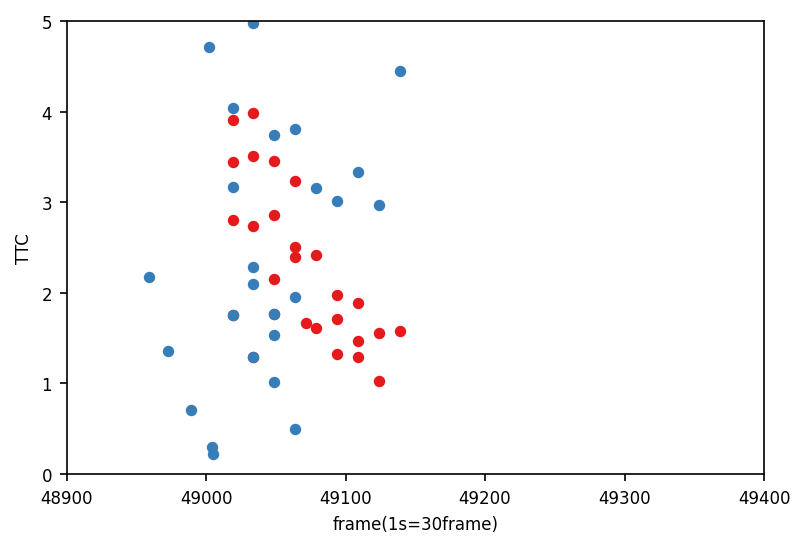

array([12508., 12830., 12884., 12913., 13103., 13161., 13243., 13283.,
       13289., 13301., 13311.])

In [549]:
start =  s13_frame 
end = e13_frame

df_ttc_graph = pd.read_csv('./output/out_csv/f13.csv',index_col=0)
df_ttc_graph = df_ttc_graph.sort_values(by='ID')
df_ttc_graph = df_ttc_graph.query('0 < ttc')

fig = plt.figure(facecolor="w",dpi=150)
ax = fig.add_subplot(1, 1, 1, aspect="equal")

ax.axis('tight')

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("Set1").colors)

#メモリのフォントサイズ
ax.tick_params(axis='x',labelsize = 8)
ax.tick_params(axis='y',labelsize = 8)
#ax.tick_params(axis='z',labelsize = 8)

ax.set_xlabel("frame(1s=30frame)", size = 8)
ax.set_ylabel("TTC", size = 8)
#ax.set_zlabel("x(1s=30frame)", size = 8)

#xのラベルを消す
#ax.set_zticks([])

ax.set_xlim([start,end]) #x軸の範囲
ax.set_xlim([48900,49400]) #x軸の範囲
ax.set_ylim([0,5]) #y軸の範囲


#ax.invert_xaxis()#にてy軸を逆転

#ax.set_title('Title')

for ID, group in df_ttc_graph.groupby('class_id'):
    frame = group['frame_f']
    ttc = group['ttc']
    #print(f_max, f_min, car_id)

    #plt.scatter(x_c_trans, y_c_trans,frame, cmap='jet',s=5)
    
    #ax.scatter(y_c_trans,x_c_trans,frame,marker="o",linestyle='None',s=0.1)
    ax.scatter(frame,ttc,linestyle='None',s=20)
    

# ax.axis('tight')
plt.savefig('output/out_csv/f13.png')
plt.show()
df_ttc_graph['ID'].unique()


In [552]:
df_ttc_graph = pd.read_csv('./output/out_csv/f13.csv',index_col=0)
df_ttc_graph = df_ttc_graph.sort_values(by='ID')
df_ttc_graph = df_ttc_graph.query('0 < ttc')

df_ttc_graph = df_ttc_graph.query('class_id == 7')
df_ttc_graph = df_ttc_graph.query('0<ttc < 5')
print(df_ttc_graph)
df_ttc_graph.describe()

        ID  class_id  all_distance  frame_dif  x_vec_dif  y_vec_dif  \
2  12884.0       7.0     63.836565       28.0   0.111568   1.367304   
2  12884.0       7.0     60.929119       28.0   0.187889   1.504962   
2  12884.0       7.0     71.266907       28.0   0.246830   1.470530   
2  12884.0       7.0     54.012041       21.0   0.548851   1.705254   
2  12884.0       7.0     61.841046       28.0  -0.008174   1.200132   
2  12913.0       7.0     62.036783       28.0  -0.384382   1.118978   
2  12913.0       7.0     60.283641       28.0  -0.153649   1.421271   
3  12913.0       7.0     57.781147       28.0  -0.047419   1.518724   
2  12913.0       7.0     70.850971       28.0  -0.136930   1.438079   
3  12913.0       7.0     56.805829       28.0  -0.169003   1.388403   
2  12913.0       7.0     67.343011       28.0   0.163781   1.969653   
3  12913.0       7.0     45.174726       19.0   0.221092   1.325019   
3  12913.0       7.0     58.105706       28.0   0.044054   1.505138   
3  129

ID  class_id  all_distance  frame_dif  x_vec_dif  y_vec_dif  \
count     27.000000      27.0     27.000000  27.000000  27.000000  27.000000   
mean   13042.888889       7.0     70.572685  26.296296  -0.101660   1.037777   
std      164.167441       0.0     21.479157   4.231883   0.527237   1.235055   
min    12884.000000       7.0     29.441791  11.000000  -1.660197  -2.745480   
25%    12913.000000       7.0     57.943426  28.000000  -0.177393   1.171502   
50%    12913.000000       7.0     63.836565  28.000000  -0.008174   1.438079   
75%    13103.000000       7.0     84.690776  28.000000   0.204490   1.527627   
max    13311.000000       7.0    119.378243  28.000000   0.548851   1.969653   

        x_trans_l   y_trans_l       frame_f        ttc          V_r  \
count   27.000000   27.000000     27.000000  27.000000    27.000000   
mean   313.905016  396.244147  49067.629630   2.271385  2421.669125   
std     24.423820  119.004214     36.352069   0.869753   402.220882   
min    264.311437  230.591946  49019.000000   1.032312  1946.406256   
25%    303.474017  325.823714  49034.000000   1.593532  2192.240899   
50%    316.651101  375.504490  49064.000000   1.973817  2352.043228   
75%    335.281428  424.913630  49094.000000   2.834845  2558.881292   
max    341.955211  709.089168  49139.000000   3.984361  3805.539127   

           degree  
count   27.000000  
mean   330.494324  
std     15.716782  
min    287.051909  
25%    326.877404  
50%    335.487379  
75%    340.126918  
max    349.584672

## ループ処理行う

In [16]:
df_set = 0
num_list = 0
time_for = 0

for time_for in range(100,300,15):    
    df_speed = df_class_id.drop(columns=["x", "y", "w", "h",'x_c','y_c'])
    #df_speed = df_speed.query('class_id==7')
    class_person = 7
    class_bicycle = 10

    # df_set = 0
    # num_list = 0

    #対象フレーム設定
    df_speed = df_speed.query('@s8_frame<frame<@e8_frame')
    # time_for = 0
# for time_for in range(100,300,15):
    print(time_for)

    frame_zero_f = s8_frame + time_for #デフォルトは450
    frame_zero_e = frame_zero_f + 30

    df_speed = df_speed.query('@frame_zero_f<frame<@frame_zero_e')
    df_speed = df_speed.query('class_id == [7,10]')
    df_speed = df_speed.query(' 200< x_trans < 600 & 200 <y_trans< 800')
    #df_speed = df_speed.groupby(['ID'])
    # print(df_speed)

    cols = ['ID','class_id','all_distance','frame_dif','x_vec_dif','y_vec_dif','x_trans_l','y_trans_l','frame_f']
    df_frame_info = pd.DataFrame(index=[], columns=cols)
    print(df_frame_info)

    id_num = df_speed['ID'].unique()
    for id in id_num:
        
        #print(id)
        df_speed_id = df_speed.query('ID==@id')
        #class_id = df_speed_id['class_id']
        x_y = df_speed_id[['x_trans','y_trans']].values
        #print(x_y)
        # 各点間の差を取得
        x_y = np.diff(x_y, axis=0)
        # 各点間のユークリッド距離を計算
        every_distance = np.linalg.norm(x_y, axis=1)
        #print(every_distance)
        all_distance = np.sum(every_distance)
        #print(all_distance)

        #フレーム差を取得
        df_speed_f = df_speed.groupby(['ID'],as_index=False).first()
        df_speed_l = df_speed.groupby(['ID'],as_index=False).last()
        
        frame_f = df_speed_f.query('ID==@id')
        class_id = int(frame_f.iloc[0,2])
        # frame_f = frame_f.iloc[0,1]

        frame_vec_x_f = frame_f.iloc[0,3]
        frame_vec_y_f = frame_f.iloc[0,4]

        frame_f = frame_f.iloc[0,1]
        frame_l = df_speed_l.query('ID==@id')

        frame_vec_x_l = frame_l.iloc[0,3]
        frame_vec_y_l = frame_l.iloc[0,4]

        frame_l = frame_l.iloc[0,1]
        frame_dif = frame_l - frame_f

        #ベクトルの長さを出す
        frame_vec_f = np.array([frame_vec_x_f,frame_vec_y_f])
        frame_vec_l = np.array([frame_vec_x_l,frame_vec_y_l])

        frame_vec = (frame_vec_l - frame_vec_f)/frame_dif

        x_vec = frame_vec[0]
        y_vec = frame_vec[1]
        
        # print(frame_vec)
        #class_id = frame_f.iloc[0,2]


        append_list = pd.Series([id,class_id,all_distance,frame_dif,x_vec,y_vec,frame_vec_x_l,frame_vec_y_l,frame_f],index=['ID','class_id','all_distance','frame_dif','x_vec_dif','y_vec_dif','x_trans_l','y_trans_l','frame_f'])
        df_frame_info = df_frame_info.append(append_list,ignore_index=True)
        #print(df_frame_info)
        df_frame_info = df_frame_info.query('10<frame_dif')

    # print(df_frame_info)


    # df_frame_info_vec = df_frame_info.query('class_id==10')
    # num_bike_list =  df_frame_info_vec['ID'].unique()
    from numpy import linalg as LA

    fps = 30
    expansion = 4/1000

    use_figure_len = 45 #(44mm,実際に合わせた地図,基準の距離を測る)
    use_figure_pxcel_h = 561.7
    use_figure_pxcel_w = 1000

    # 換算計算
    real_len = use_figure_len / expansion 
    # print(real_len)
    cel_real_len = real_len / use_figure_pxcel_h

    ###################
    # a= df_frame_info['ID'].isin(int(6946))
    # print(a)
    row_num  = df_frame_info.query('ID == 6946').index[0]
    print(row_num)
    ###################

    if df_set == 0 :

        df_frame_info_vec = df_frame_info
        df_frame_info_vec['ttc'] = 0
        df_frame_info_vec['V_r'] = 0
        df_frame_info_vec['degree'] = 0
        # df_frame_info_vec['frame_f'] = 0

        df_set = df_set + 1

    df_frame_low_list = df_frame_info['ID'].unique() 
    # print(df_frame_low_list)
    num_list = 0
    for num_list_for in df_frame_low_list:
        
        # print(num_list)

        #対象行の抽出
        x_num_bike = df_frame_info.iloc[row_num,6]
        y_num_bike = df_frame_info.iloc[row_num,7]
        num_bike_vec_position = np.array([x_num_bike,y_num_bike])
        vec_id_bike = df_frame_info.iloc[row_num,0]
        num_bike_vec_speed_x = df_frame_info.iloc[row_num,4]
        num_bike_vec_speed_y = df_frame_info.iloc[row_num,5]
        num_bike_vec_speed = np.array([num_bike_vec_speed_x,num_bike_vec_speed_y])

        #対象以外の抽出
        row_x_trans_l = df_frame_info.iloc[num_list,6]
        row_y_trans_l = df_frame_info.iloc[num_list,7]
        row_vec_position = np.array([row_x_trans_l,row_y_trans_l])
        vec_id_row = df_frame_info.iloc[num_list,0]
        row_vec_speed_x = df_frame_info.iloc[num_list,4]
        row_vec_speed_y = df_frame_info.iloc[num_list,5]
        row_vec_speed = np.array([row_vec_speed_x,row_vec_speed_y])
        row_frame_f = df_frame_info.iloc[num_list,4]

        #使用する特徴量
        distance_vec = (row_vec_position - num_bike_vec_position)
        distance_norm = np.linalg.norm(distance_vec)*cel_real_len
        speed_vec = (row_vec_speed - num_bike_vec_speed)*fps*cel_real_len

        if num_bike_vec_speed_y >= 0 and row_vec_speed_y >= 0 :
            if distance_vec[1] >= 0 :
                speed_vec = speed_vec
            else :
                speed_vec = [0.000001,0.000001]

        elif num_bike_vec_speed_y < 0 and row_vec_speed_y < 0 :
            if distance_vec[1] >= 0 :
                speed_vec = [0.000001,0.000001]
            else :
                speed_vec = speed_vec
        
        elif num_bike_vec_speed_y >= 0 and row_vec_speed_y < 0 :
            if distance_vec[1] >= 0 :
                speed_vec = speed_vec
            else :
                speed_vec = [0.000001,0.000001]

        elif num_bike_vec_speed_y < 0 and row_vec_speed_y >= 0 :
            if distance_vec[1] >= 0 :
                speed_vec = [0.000001,0.000001]
            else :
                speed_vec = speed_vec

        inner = np.inner(speed_vec,distance_vec)
        norm = LA.norm(speed_vec) * LA.norm(distance_vec)

        cos_vec = inner / (norm+0.00001) 
        radian = np.arccos(np.clip(cos_vec, -1.0, 1.0))
        radian = radian + np.pi
        # print(radian)
        # if speed_norm < 0
        speed_norm = np.linalg.norm(speed_vec)

        ttc_time = distance_norm/((speed_norm * np.cos(radian))+0.00001)

        df_frame_info_vec.iloc[num_list,9]= ttc_time
        df_frame_info_vec.iloc[num_list,10]= speed_norm
        df_frame_info_vec.iloc[num_list,11]= np.rad2deg(radian)
        df_frame_info_vec.iloc[num_list,8]= row_frame_f

        # print(df_frame_info_vec) 
        df_frame_info_vec = pd.concat([df_frame_info_vec,df_frame_info_vec])

        num_list = num_list + 1
        
print(df_frame_info_vec)


100
Empty DataFrame
Columns: [ID, class_id, all_distance, frame_dif, x_vec_dif, y_vec_dif, x_trans_l, y_trans_l, frame_f]
Index: []
0
115
Empty DataFrame
Columns: [ID, class_id, all_distance, frame_dif, x_vec_dif, y_vec_dif, x_trans_l, y_trans_l, frame_f]
Index: []
0


/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_50798/4129051732.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame_info = df_frame_info.append(append_list,ignore_index=True)
/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_50798/4129051732.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame_info = df_frame_info.append(append_list,ignore_index=True)
/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_50798/4129051732.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame_info = df_frame_info.append(append_list,ignore_index=True)
/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_50798/4129051732.py:83: FutureWarning: The frame.append method is deprecated and wi

130
Empty DataFrame
Columns: [ID, class_id, all_distance, frame_dif, x_vec_dif, y_vec_dif, x_trans_l, y_trans_l, frame_f]
Index: []
0


/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_50798/4129051732.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame_info = df_frame_info.append(append_list,ignore_index=True)
/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_50798/4129051732.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame_info = df_frame_info.append(append_list,ignore_index=True)
/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_50798/4129051732.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame_info = df_frame_info.append(append_list,ignore_index=True)
/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_50798/4129051732.py:83: FutureWarning: The frame.append method is deprecated and wi

145
Empty DataFrame
Columns: [ID, class_id, all_distance, frame_dif, x_vec_dif, y_vec_dif, x_trans_l, y_trans_l, frame_f]
Index: []
0


/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_50798/4129051732.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame_info = df_frame_info.append(append_list,ignore_index=True)
/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_50798/4129051732.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame_info = df_frame_info.append(append_list,ignore_index=True)
/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_50798/4129051732.py:83: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_frame_info = df_frame_info.append(append_list,ignore_index=True)
/var/folders/wh/tyq8rm5d0dq07l3g59hfxmq40000gn/T/ipykernel_50798/4129051732.py:83: FutureWarning: The frame.append method is deprecated and wi

# 3次元表示

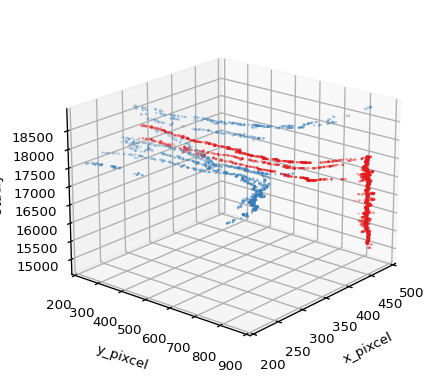

In [9]:
df_3_plot = df_class_id
df_3_plot = df_3_plot.query(' 200< x_trans < 500 & 200 <y_trans<900')

df_3 = pd.merge(df_frame_info,df_3_plot,on='ID', how='inner')
#print(df_3)
#df_3 = df_3.query("class_id==7")
#df_3 = df_3.query("200<ID<400")
#df_3 = df_3.query('100<x_trans<600')
#df_3 = df_3.query('200<y_trans<900')

fig = plt.figure(facecolor="w",dpi=120)

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("Set1").colors)


#ax = fig.add_subplot(1, 1, 1, aspect="equal",projection='3d')
ax = fig.add_subplot(projection='3d')
#elev=-90, azim=90 が基本
ax.view_init(elev=20, azim=40) #elev;縦方向回転　azim:横方向回転

#メモリのフォントサイズ
ax.tick_params(axis='x',labelsize = 8)
ax.tick_params(axis='y',labelsize = 8)
ax.tick_params(axis='z',labelsize = 8)

ax.set_xlabel("x_pixcel", size = 8)
ax.set_ylabel("y_pixcel", size = 8)
ax.set_zlabel("frame", size = 8)

#xのラベルを消す
#ax.set_zticks([])

ax.set_xlim([200,500]) #x軸の範囲
ax.set_ylim([200,900]) #y軸の範囲

ax.invert_xaxis()#にてy軸を逆転

#ax.set_title('Title')

for ID, group in df_3.groupby('class_id_x'):
    frame = group['frame']
    car_id = group['ID']
    id_max = max(car_id)
    id_min = min(car_id)
    f_max = max(frame)
    f_min = min(frame)
    x_c_trans = group['x_trans']
    y_c_trans = group['y_trans']
    class_ID = group['class_id_x']
    #print(f_max, f_min, car_id)

    #plt.scatter(x_c_trans, y_c_trans,frame, cmap='jet',s=5)
    
    #ax.scatter(y_c_trans,x_c_trans,frame,marker="o",linestyle='None',s=0.1)
    ax.scatter(x_c_trans,y_c_trans,frame,linestyle='None',s=0.1)


plt.savefig('output/out3d_kyoto_c_no3_fir1_6.png')
plt.show()


          ID  class_id_x  all_distance  frame_dif  real_speed  frame     x  \
0     6946.0        10.0    709.212005      139.0   12.262828  26481  1015   
1     6946.0        10.0    709.212005      139.0   12.262828  26482  1021   
2     6946.0        10.0    709.212005      139.0   12.262828  26483  1025   
3     6946.0        10.0    709.212005      139.0   12.262828  26484  1029   
4     6946.0        10.0    709.212005      139.0   12.262828  26485  1028   
...      ...         ...           ...        ...         ...    ...   ...   
4416  7870.0         7.0    638.169719      187.0    8.202079  27645  1155   
4417  7870.0         7.0    638.169719      187.0    8.202079  27646  1155   
4418  7870.0         7.0    638.169719      187.0    8.202079  27647  1152   
4419  7870.0         7.0    638.169719      187.0    8.202079  27648  1150   
4420  7870.0         7.0    638.169719      187.0    8.202079  27649  1150   

        y   w    h class_id_y     x_c  y_c     x_trans     y_tr

/var/folders/s_/rl9604cd5r1026gskr5tdp580000gq/T/ipykernel_24910/822821368.py:29: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x_c_trans, y_c_trans, cmap='jet', s=0.2)


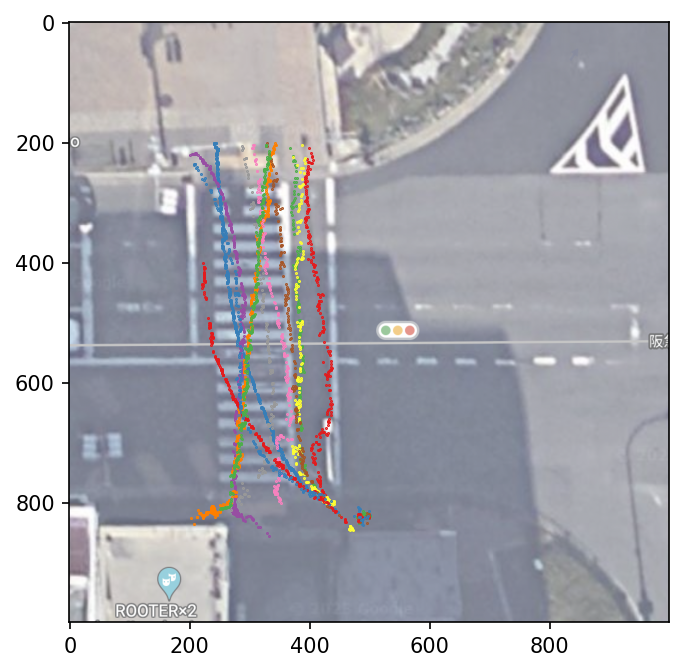

array([6946.0, 7005.0, 7466.0, 7474.0, 7494.0, 7613.0, 7616.0, 7618.0,
       7635.0, 7645.0, 7851.0, 7870.0], dtype=object)

In [139]:
#df_3 = pd.merge(df_frame_info,df_speed,on='ID', how='inner')
print(df_3)
#df_3 = df_3.query("class_id==7")
#df_3 = df_3.query("200<ID<400")
#df_3 = df_3.query('100<x_trans<600')
#df_3 = df_3.query('200<y_trans<900')
fig = plt.figure(facecolor="w",dpi=150)
ax = fig.add_subplot(1, 1, 1, aspect="equal")

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("Set1").colors)

#ax.invert_yaxis()#にてy軸を逆転

for ID, group in df_3.groupby('ID'):
    frame = group['frame']
    car_id = group['ID']
    id_max = max(car_id)
    id_min = min(car_id)
    f_max = max(frame)
    f_min = min(frame)
    x_c_trans = group['x_trans']
    y_c_trans = group['y_trans']
    class_ID = group['class_id_x']
    #print(f_max, f_min, car_id)

    #plt.scatter(x_c_trans, y_c_trans,frame, cmap='jet',s=5)
    
    #plt.scatter(x_c_trans, y_c_trans, cmap='jet', s=0.1)
    ax.scatter(x_c_trans, y_c_trans, cmap='jet', s=0.2)

im = Image.open('thumbnails/kyoto_c_3_1000_1000.png')
plt.imshow(im, alpha=0.6)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.savefig('output/outplot_kyoto_c_no3_fir1_8.png')

plt.show()
df_3.head(60)
df_3['ID'].unique()

7.0
10.0
          ID  class_id_x  all_distance  frame_dif  real_speed  frame     x  \
0     4155.0         7.0    526.145297      123.0   10.280871  14867  1385   
1968  4155.0         7.0    526.145297      123.0   10.280871  17367  1395   
1969  4155.0         7.0    526.145297      123.0   10.280871  17368  1394   
1970  4155.0         7.0    526.145297      123.0   10.280871  17369  1394   
1971  4155.0         7.0    526.145297      123.0   10.280871  17370  1394   
...      ...         ...           ...        ...         ...    ...   ...   
2492  4927.0        10.0    676.144302      150.0   10.833717  17418  1691   
2493  4927.0        10.0    676.144302      150.0   10.833717  17419  1689   
2494  4927.0        10.0    676.144302      150.0   10.833717  17420  1689   
2486  4927.0        10.0    676.144302      150.0   10.833717  17412  1691   
4321  5368.0        10.0    543.686455       95.0   13.754799  18797  1382   

        y    w   h class_id_y     x_c  y_c     x_trans

/var/folders/s_/rl9604cd5r1026gskr5tdp580000gq/T/ipykernel_37482/2449665171.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x_c_trans, y_c_trans, cmap='jet', s=0.2)


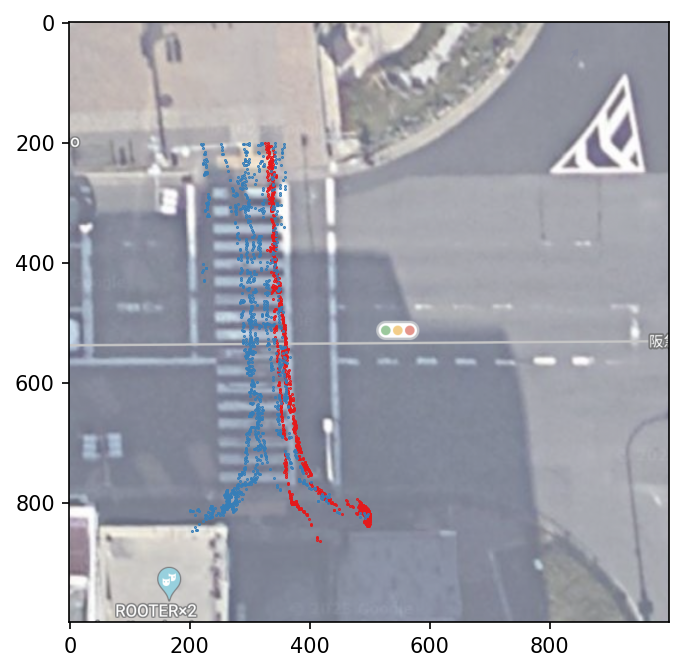

array([4155.0, 5025.0, 4956.0, 4999.0, 5071.0, 5062.0, 5368.0, 5350.0,
       5239.0, 5102.0, 4822.0, 5005.0, 4927.0], dtype=object)

In [13]:
df_3_plot = df_class_id
df_3_plot = df_3_plot.query(' 200< x_trans < 500 & 200 <y_trans<900')

df_3 = pd.merge(df_frame_info,df_3_plot,on='ID', how='inner')
#df_3 = pd.merge(df_frame_info,df_speed,on='ID', how='inner')
#print(df_3)
#df_3 = df_3.query("class_id==7")
#df_3 = df_3.query("200<ID<400")
#df_3 = df_3.query('100<x_trans<600')
#df_3 = df_3.query('200<y_trans<900')
fig = plt.figure(facecolor="w",dpi=150)
ax = fig.add_subplot(1, 1, 1, aspect="equal")

#赤と青のバターン
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("Set1").colors)
#出力結果に合わせる，人緑，自転車：あお
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", ["#adff2f", "#4682b4"])

#df_3 = df_3.groupby('class_id_x')
df_3 = df_3.sort_values(by='class_id_x')
#print(df_3)
#ax.invert_yaxis()#にてy軸を逆転

for ID, group in df_3.groupby('class_id_x'):
    frame = group['frame']
    car_id = group['ID']
    id_max = max(car_id)
    id_min = min(car_id)
    f_max = max(frame)
    f_min = min(frame)
    x_c_trans = group['x_trans']
    y_c_trans = group['y_trans']
    class_ID = group['class_id_x']
    #print(f_max, f_min, car_id)
    print(ID)

    #plt.scatter(x_c_trans, y_c_trans,frame, cmap='jet',s=5)
    
    #plt.scatter(x_c_trans, y_c_trans, cmap='jet', s=0.1)
    ax.scatter(x_c_trans, y_c_trans, cmap='jet', s=0.2)
    #ax.axis("off")
print(df_3)
im = Image.open('thumbnails/kyoto_c_3_1000_1000.png')
im_2 = Image.open('thumbnails/lebel.png')
plt.imshow(im, alpha=0.6)
#plt.imshow(im_2, alpha=0.6)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

plt.savefig('output/outplot_class_kyoto_c_no3_fir1_6.png')

plt.show()

df_3['ID'].unique()

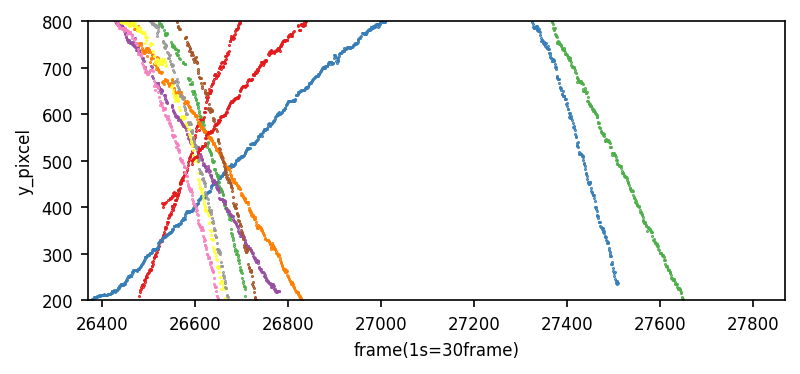

          ID  class_id_x  all_distance  frame_dif  real_speed  frame     x  \
2210  7494.0         7.0    804.105375      261.0    7.404603  26111  1766   
2447  7494.0         7.0    804.105375      261.0    7.404603  26348  1770   
2448  7494.0         7.0    804.105375      261.0    7.404603  26349  1769   
2449  7494.0         7.0    804.105375      261.0    7.404603  26350  1769   
2450  7494.0         7.0    804.105375      261.0    7.404603  26351  1769   
...      ...         ...           ...        ...         ...    ...   ...   
3290  7616.0        10.0    605.145081      108.0   13.466821  26721  1171   
3289  7616.0        10.0    605.145081      108.0   13.466821  26720  1172   
3288  7616.0        10.0    605.145081      108.0   13.466821  26719  1173   
3312  7618.0        10.0    747.521600      135.0   13.308200  26444  1588   
0     6946.0        10.0    709.212005      139.0   12.262828  26481  1015   

        y   w    h class_id_y     x_c  y_c     x_trans     y_tr

array([7494.0, 7474.0, 7870.0, 7851.0, 7645.0, 7005.0, 7635.0, 6946.0,
       7616.0, 7613.0, 7466.0, 7618.0], dtype=object)

In [141]:
start =  s8_frame 
end = e8_frame

#df_3 = pd.merge(df_frame_info,df_speed,on='ID', how='inner')
#print(df_3)
#df_3 = df_3.query("class_id==7")
#df_3 = df_3.query("200<ID<400")
#df_3 = df_3.query('100<x_trans<600')
#df_3 = df_3.query('200<y_trans<900')

fig = plt.figure(facecolor="w",dpi=150)
ax = fig.add_subplot(1, 1, 1, aspect="equal")

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("Set1").colors)


#ax = fig.add_subplot(1, 1, 1, aspect="equal",projection='3d')
#ax = fig.add_subplot(projection='3d')
#elev=-90, azim=90 が基本
#ax.view_init(elev=-90, azim=90) #elev;縦方向回転　azim:横方向回転

#メモリのフォントサイズ
ax.tick_params(axis='x',labelsize = 8)
ax.tick_params(axis='y',labelsize = 8)
#ax.tick_params(axis='z',labelsize = 8)

ax.set_xlabel("frame(1s=30frame)", size = 8)
ax.set_ylabel("y_pixcel", size = 8)
#ax.set_zlabel("x(1s=30frame)", size = 8)

#xのラベルを消す
#ax.set_zticks([])


ax.set_xlim([start,end]) #x軸の範囲(frame)
ax.set_ylim([200,800]) #y軸の範囲


#ax.invert_xaxis()#にてy軸を逆転

#ax.set_title('Title')

for ID, group in df_3.groupby('ID'):
    frame = group['frame']
    car_id = group['ID']
    id_max = max(car_id)
    id_min = min(car_id)
    f_max = max(frame)
    f_min = min(frame)
    x_c_trans = group['x_trans']
    y_c_trans = group['y_trans']
    class_ID = group['class_id_x']
    #print(f_max, f_min, car_id)

    #plt.scatter(x_c_trans, y_c_trans,frame, cmap='jet',s=5)
    
    #ax.scatter(y_c_trans,x_c_trans,frame,marker="o",linestyle='None',s=0.1)
    ax.scatter(frame,y_c_trans,linestyle='None',s=0.2)
    


plt.savefig('output/out_frame_y_kyoto_c_no3_fir1_8.png')
plt.show()
print(df_3)
df_3['ID'].unique()

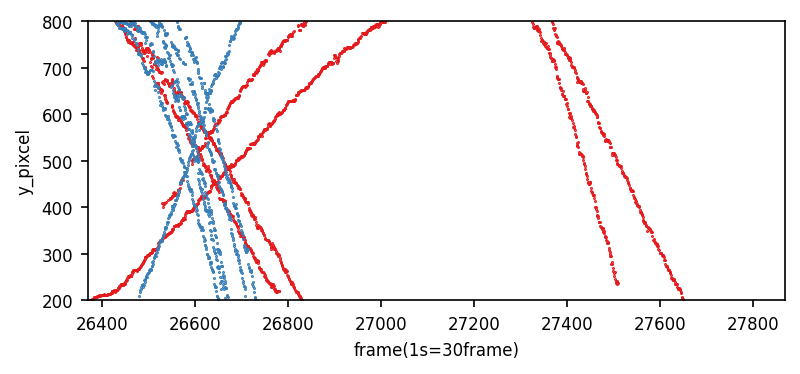

array([7494.0, 7474.0, 7870.0, 7851.0, 7645.0, 7005.0, 7635.0, 6946.0,
       7616.0, 7613.0, 7466.0, 7618.0], dtype=object)

In [142]:
#df_3 = pd.merge(df_frame_info,df_speed,on='ID', how='inner')
#print(df_3)
#df_3 = df_3.query("class_id==7")
#df_3 = df_3.query("200<ID<400")
#df_3 = df_3.query('100<x_trans<600')
#df_3 = df_3.query('200<y_trans<900')

fig = plt.figure(facecolor="w",dpi=150)
ax = fig.add_subplot(1, 1, 1, aspect="equal")

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("Set1").colors)


#ax = fig.add_subplot(1, 1, 1, aspect="equal",projection='3d')
#ax = fig.add_subplot(projection='3d')
#elev=-90, azim=90 が基本
#ax.view_init(elev=-90, azim=90) #elev;縦方向回転　azim:横方向回転

#メモリのフォントサイズ
ax.tick_params(axis='x',labelsize = 8)
ax.tick_params(axis='y',labelsize = 8)
#ax.tick_params(axis='z',labelsize = 8)

ax.set_xlabel("frame(1s=30frame)", size = 8)
ax.set_ylabel("y_pixcel", size = 8)
#ax.set_zlabel("x(1s=30frame)", size = 8)

#xのラベルを消す
#ax.set_zticks([])

ax.set_xlim([start,end]) #x軸の範囲
ax.set_ylim([200,800]) #y軸の範囲


#ax.invert_xaxis()#にてy軸を逆転

#ax.set_title('Title')

for ID, group in df_3.groupby('class_id_x'):
    frame = group['frame']
    car_id = group['ID']
    id_max = max(car_id)
    id_min = min(car_id)
    f_max = max(frame)
    f_min = min(frame)
    x_c_trans = group['x_trans']
    y_c_trans = group['y_trans']
    class_ID = group['class_id_x']
    #print(f_max, f_min, car_id)

    #plt.scatter(x_c_trans, y_c_trans,frame, cmap='jet',s=5)
    
    #ax.scatter(y_c_trans,x_c_trans,frame,marker="o",linestyle='None',s=0.1)
    ax.scatter(frame,y_c_trans,linestyle='None',s=0.2)
    


plt.savefig('output/out_frame_class_kyoto_c_no3_fir1_8.png')
plt.show()
df_3['ID'].unique()

In [10]:
df_3_plot = df_class_id
df_3_plot = df_3_plot.query(' 200< x_trans < 500 & 200 <y_trans<900')
df_3_plot = df_3_plot.query(' 17000< frame ')

df_3 = pd.merge(df_frame_info,df_3_plot,on='ID', how='inner')
df_3_movie = pd.merge(df_frame_info,df_3_plot,on='ID', how='inner')
df_3_plus = df_3

#df_3 = pd.merge(df_frame_info,df_speed,on='ID', how='inner')
#print(df_3)
#df_3 = df_3.query("class_id==7")
#df_3 = df_3.query("200<ID<400")
#df_3 = df_3.query('100<x_trans<600')
#df_3 = df_3.query('200<y_trans<900')
fig = plt.figure(facecolor="w",dpi=150)
ax = fig.add_subplot(1, 1, 1, aspect="equal")

#赤と青のバターン
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("Set1").colors)
#出力結果に合わせる，人緑，自転車：あお
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", ["#adff2f", "#4682b4"])

#df_3 = df_3.groupby('class_id_x')
df_3 = df_3.sort_values(by='class_id_x')
#print(df_3)
#ax.invert_yaxis()#にてy軸を逆転

id_num = df_3['frame'].unique()
id_len = len(id_num)

for ID, group in df_3_movie.groupby('frame'):
    print(ID)
    filnum = str(ID)
    df_3 = df_3.query('frame == @ID ')
    # print(df_3)
    

    for ID, group in df_3.groupby('class_id_x'):
        frame = group['frame']
        car_id = group['ID']
        id_max = max(car_id)
        id_min = min(car_id)
        f_max = max(frame)
        f_min = min(frame)
        x_c_trans = group['x_trans']
        y_c_trans = group['y_trans']
        class_ID = group['class_id_x']
        #print(f_max, f_min, car_id)
        class_ID =  list(class_ID)
        class_ID = class_ID[0]
        print(car_id)

        
    

        #plt.scatter(x_c_trans, y_c_trans,frame, cmap='jet',s=5)
        
        #plt.scatter(x_c_trans, y_c_trans, cmap='jet', s=0.1)

        if class_ID == 7 :
            ax.scatter(x_c_trans, y_c_trans,color = '#adff2f' ,s=10)

        if class_ID == 10:
            ax.scatter(x_c_trans, y_c_trans,color = '#4682b4', s=10)
        
        #ax.axis("off")
        # print(df_3)
        im = Image.open('thumbnails/kyoto_c_3_1000_1000.png')
        im_2 = Image.open('thumbnails/lebel.png')
        plt.imshow(im, alpha=0.6)
        #plt.imshow(im_2, alpha=0.6)
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

        filname = 'output/movie_plot_2/'+'outplot_class_'+filnum+'.png'

        plt.savefig(filname)
        print(str(filnum)+'/'+str(id_len))
        print(filname)
        # fig = plt.figure(facecolor="w",dpi=150)
        # ax = fig.add_subplot(1, 1, 1, aspect="equal")
    df_3 = df_3_plus
        
    print(ID)
    

# plt.show()

df_3['ID'].unique()

17001
0    4155.0
Name: ID, dtype: object
17001/1276
output/movie_plot_2/outplot_class_17001.png
7.0
17002
1    4155.0
Name: ID, dtype: object
17002/1276
output/movie_plot_2/outplot_class_17002.png
7.0
17003
2    4155.0
Name: ID, dtype: object
17003/1276
output/movie_plot_2/outplot_class_17003.png
7.0
17004
3    4155.0
Name: ID, dtype: object
17004/1276
output/movie_plot_2/outplot_class_17004.png
7.0
17005
4    4155.0
Name: ID, dtype: object
17005/1276
output/movie_plot_2/outplot_class_17005.png
7.0
17006
5    4155.0
Name: ID, dtype: object
17006/1276
output/movie_plot_2/outplot_class_17006.png
7.0
17007
6    4155.0
Name: ID, dtype: object
17007/1276
output/movie_plot_2/outplot_class_17007.png
7.0
17013
7    4155.0
Name: ID, dtype: object
17013/1276
output/movie_plot_2/outplot_class_17013.png
7.0
17014
8    4155.0
Name: ID, dtype: object
17014/1276
output/movie_plot_2/outplot_class_17014.png
7.0
17015
9    4155.0
Name: ID, dtype: object
17015/1276
output/movie_plot_2/outplot_class_1701